# Linear regression and correlation
Study of simultaneous change in two or more variables can be carried out using techniques of regression and correlation. A regression equation is a mathematical relationship which can be used to determine the expected value of a **dependent** (or **response**) variable $X$ for a given value of a correlated **independent** (or **predictor**) variable $Y$.

## The least square regression line and its estimation
Linear regression aims at finding parameters $\alpha$ and $\beta$ such that X and Y are connected by a linear relationship: $$Y = \alpha + \beta X$$
The method almost universally used to calculate estimates of $\alpha$ and $\beta$ with a set of $n (X, Y)$ is the **method of least squares**. With this method, parameters of the linear regression of Y on X are calculated so that the sum of the squares of the deviations between the points and the regression line (called **residuals**) are minimized. The parameters are calculated as follows: 
$$\hat{\beta} = \frac{Sxy}{Sxx}$$ 
$$\hat{\alpha} = \bar{Y} - \hat{\beta} \bar{X}$$

$Sxy$ is the **corrected sum of products**: $$\sum (X - \bar{X})(Y - \bar{Y}) = \sum(XY) - \frac{(\sum X)(\sum Y)}{n}$$
$Sxx$ is the **corrected sum of squares of $X$ values**: $$\sum (X - \bar{X})^2 = \sum X^2 - \frac{(\sum X)^2}{n}$$

Thus the equation of the **fitted line** is $$\hat{Y} = \hat{\alpha} + \hat{\beta}X$$
$\hat{Y}$ is the fitted (expected) value for a given $X$ value.

Let's generate random linearly correlated values and calculate the regression line.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from math import sqrt
from scipy.stats import f, t, probplot, shapiro

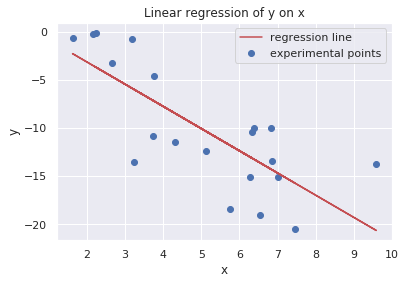

In [2]:
#uniformly distributed random values between 0 and 10
x = np.random.uniform(1, 10, size=20)
#x = np.array([0, 25, 50, 75, 100, 125])

#y values linearly correlated to x with a normal "noise" with standard deviation of 4
y = np.array([i * -2 + 1 + np.random.normal() * 4 for i in x])
#y = np.array([3.7, 4.45, 4.75, 5.2, 5.15, 4.95])

#corrected sum of products Sxy
Sxy = np.sum(x * y) - np.sum(x) * np.sum(y) / len(x)

#corrected sum of squares of X
Sxx = np.sum(x ** 2) - np.sum(x) ** 2 / len(x)

#calculation of the parameters of the regression line y = a * x + b
b = Sxy / Sxx
a = np.mean(y) - b * np.mean(x)

#calculate fitted y values
y_hat = np.array([a + b * i for i in x])

#plot values
fig, ax = plt.subplots()
ax.scatter(x, y, color="C0", label="experimental points")
ax.plot(x, y_hat, color="C3", label="regression line")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Linear regression of y on x")
#ax.set_xlim(-1, 101)
#ax.set_ylim(-1, 22)
ax.legend()
plt.show()

## The goodness of fit
For each observed $(X, Y)$ pair the **residual** is the observed Y-value minus the fitted Y-value: $residual = Y - \hat{Y}$. Examination of the residuals allows to investigate the adequacy of the model. The **sum of squared residuals** (or sum of squared errors, because they represent the error between the actual and fitted values) is $$SSE = \sum(Y - \hat{Y}) ^2$$
The **regression sum of squares** is $$SSR = \sum(\hat{Y} - \bar{Y}) ^2$$
By dividing SSR by SSE + SSR we can measure the **goodness of fit** of the points to a straight line. When the fit is perfect SSE is 0 so this ratio is equal to 1. $$R^2 = \frac{SSR}{SSE + SSR}$$
$R^2$ is the proportion of the variation in y values accounted for by the linear regression model.

In [3]:
#calculation of R-sq
SSE = np.sum((y - y_hat) ** 2)
SSR = np.sum((y_hat - np.mean(y)) ** 2)
Rsq = SSR / (SSE + SSR)
print("R-square = {:.3f}".format(Rsq))

R-square = 0.590


The $R^2$ value is an adequate measure of goodness of fit for simple linear regression when the estimates of $\alpha$ and $\beta$ are found by the method of least squares and the assumption of normality and homogeneity of variance are valid (see next section). When more parameters are added to the model, $R^2$ will tend to increase. The adjusted $R^2$ gives a measure of goodness of fit after adjustment for the extra terms in the model. $R^2$ is equal to the difference between the **total mean square** $\frac{\sum (Y - \bar{Y}) ^2}{n - 1}$ and **the residual mean square** $\frac{SSE}{n - 2}$, divided by the total mean square:
$$R^2_{adj} = \frac{\frac{\sum (Y - \bar{Y}) ^2}{n - 1} - \frac{SSE}{n-2}}{\frac{\sum (Y - \bar{Y}) ^2}{n - 1}}$$

In [4]:
#calculation of adjusted R-sq

#total mean square
tms = np.sum((y - np.mean(y)) ** 2) / (len(y) - 1)

rsq_adj = (tms - SSE / (len(y) - 2)) / tms

print("Adjusted R-square = {:.3f}".format(rsq_adj))

Adjusted R-square = 0.568


Although $R^2$ measures the extent to which data lie on a straight line it is always positive. A correlation coefficient must lie between $-1$ and $+1$. It is calculated as the square root of $R^2$ and given a positive sign if $\hat{\beta}$ is positive.

In [ ]:
#calculation of the correlation coefficient
r = sqrt(Rsq) * b / abs(b)
print("Correlation coefficient r = {:.3f}".format(r))

Correlation coefficient r = -0.768


## Assumptions, hypothesis tests and confidence intervals for simple linear regression
The main assumption behind linear regression is that for each observed X value, the corresponding observed Y value is taken at random from a normal distribution with mean $\alpha + \beta X$ and variance $\sigma ^ 2$. As X increases, the means of these normal distributions lie on a straight line, and each distribution has the same variance $\sigma ^ 2$. One problem in many scientific studies is that for a given X we only observe one Y value, which could be far from $\alpha + \beta X$. In mathematical terms: $$Y = \alpha + \beta X + \epsilon$$ with $\epsilon$ a value from the normal distribution with mean 0 and variance $\sigma ^ 2$. The values of $\epsilon$ are estimated by the residuals $Y - \hat{Y}$, so an analysis of these residuals can be used to test the assumptions of the model.

Normality of residuals can be checked with a histogram, Q-Q plot or a Shapiro-Wilk test of residuals. Homogeneity of variance can be checked by plotting residuals agains fitted values.

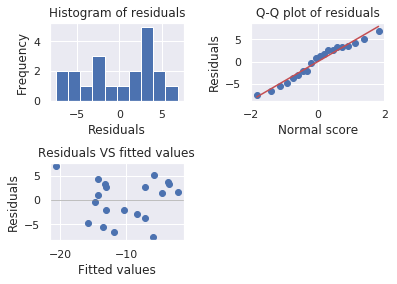

Shapiro-Wilk test on residuals
W = 0.955, p-value = 4.414e-01


In [ ]:
#calculation of residuals
residuals = np.zeros(len(y))
for i in range(len(y)):
    residuals[i] = y[i] - y_hat[i]

#plotting of residuals
fig, ((ax0, ax1), (ax2, _)) = plt.subplots(nrows=2, ncols=2)
fig.delaxes(_)
plt.subplots_adjust(wspace=0.5, hspace=0.8)
ax0.hist(residuals)
ax0.set_xlabel("Residuals")
ax0.set_ylabel("Frequency")
ax0.set_title("Histogram of residuals")
probplot(residuals, plot=ax1)
ax1.set_xlabel("Normal score")
ax1.set_ylabel("Residuals")
ax1.set_title("Q-Q plot of residuals")
ax2.scatter(y_hat, residuals)
ax2.set_xlabel("Fitted values")
ax2.set_ylabel("Residuals")
ax2.set_title("Residuals VS fitted values")
ax2.axhline(y=0, linewidth=0.5, color="grey")
plt.show()

#shapiro-wilk test on residuals
w_shap, p_shap = shapiro(residuals)
print("Shapiro-Wilk test on residuals\nW = {0:.3f}, p-value = {1:.3e}".format(w_shap, p_shap))

Given the above assumptions, the best estimate of $\sigma ^ 2$ was actually presented above, the **mean square error** 
$$MSE = \sigma ^ 2 = \frac{SSE}{n - 2}$$.
The **residual degrees of freedom** $n - 2$ are calculated this way because we have estimated two parameters: $\alpha$ and $\beta$.

### Testing the significance of the linear regression
To test whether there is a significant linear regression we set up $H_0 : \beta= 0$. To test $H_0$, we calculate the **variance ratio** by dividing the **regression mean square** $MSR = \frac{SSR}{1}$ (because $SSR$ has $1$ degree of freedom) by $MSE$ and then we compare $VR$ to the critical value for an $F$-distribution with (1, n-2) degrees of freedom: $$VR = \frac{MSR}{MSE}$$

In [ ]:
#test of the significance of the simple linear regression

#degrees of freedom of MSR
dfn = 1

#degrees of freedom of MSE
dfd = len(y) - 2

MSE = SSE / dfd

#variance ratio
vr = SSR / MSE


#p-value
p_val = 1 - f.cdf(vr, dfn, dfd)
print("Testing the significance of the slope of the linear regression")
print("F-value: {0:.3f}, p-value: {1:.3e}".format(vr, p_val))

Testing the significance of the slope of the linear regression
F-value: 25.936, p-value: 7.599e-05


### Testing the hypothesis that $\beta = \beta_0$
We may wish to test whether the true slope is a particular value and/or give a confidence interval for the true slope. $\hat{\beta}$ comes from a normal distribution with mean $\beta$ and variance $\sigma^2 / Sxx$. To test the null hypothesis $\beta = \beta_0$ we calculate $t$ as follows:
$$t = \frac{\hat{\beta} - \beta}{\sqrt{\frac{MSE}{Sxx}}}\: on \:(n - 2) \:df$$
$\sqrt{\frac{MSE}{Sxx}}$ is called the **standard error of $\hat{\beta}$**. Let's test the hypothesis that $\beta = 0$ (note that in this case $t^2 = VR$ so the F-test and the t-test are equivalent):

In [ ]:
#calculation of the standard error of b
SE_b = sqrt(MSE / Sxx)

#calculation of t-value
t_val =  b / SE_b

#calculation of p-value
p_val = 2 * (1 - t.cdf(abs(t_val), df=len(y) - 2))

print("t-value: {0:.3f}, p-value: {1:.3e}".format(t_val, p_val))

t-value: -5.093, p-value: 7.599e-05


### Confidence interval for $\beta$
A 95 % confidence interval for $\beta$ is $\hat{\beta} \pm t_{(n-2, \: 2.5\%)} \times SE \: of \: \hat{\beta}$.

In [ ]:
#95 % confidence interval for b
ci = [b - t.ppf(0.025, df=len(y) - 2) * SE_b, b + t.ppf(0.025, df=len(y) - 2) * SE_b]
print("95 % CI for beta: ({0:.3e}, {1:.3e})".format(ci[0], ci[1]))

95 % CI for beta: (-1.359e+00, -3.268e+00)


### Use of the fitted line for prediction
The predicted $Y$ for $X_0$ is $\hat{Y} = \hat{\alpha} + \hat{\beta}X$. Here, we are predicting the **population mean of possible $Y$ values which could be observed for $X_0$**. The standard error of this predicted mean is:
$$SE \: of \: predicted \: mean \: = \sqrt{MSE(\frac{1}{n} + \frac{(X_0 - \bar{X})^2}{Sxx})}$$

We can see that the standard error and hence the width of the confidence interval is smallest when $X_0$ is equal to the mean of $X$ values.

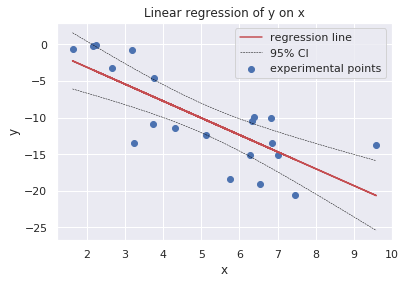

In [ ]:
#calculate confidence interval values for fitted Y values
x_val = np.linspace(min(x), max(x), 200)
y_fit = np.array([a + b * i for i in x_val])
ci_lo = np.zeros(len(x_val))
ci_hi = np.zeros(len(x_val))
for i in range(len(x_val)):
    ci_lo[i] = y_fit[i] + t.ppf(0.025, df=len(y) - 2) * sqrt(MSE * (1 / len(y) + (x_val[i] - np.mean(x)) ** 2 / Sxx))
    ci_hi[i] = y_fit[i] + t.ppf(0.975, df=len(y) - 2) * sqrt(MSE * (1 / len(y) + (x_val[i] - np.mean(x)) ** 2 / Sxx))

#plot linear regression with confidence interval on fitted Y values
fig, ax = plt.subplots()
ax.scatter(x, y, color="C0", label="experimental points")
ax.plot(x, y_hat, color="C3", label="regression line")
ax.plot(x_val, ci_lo, color="black", linestyle="--", linewidth=0.5, label="95% CI")
ax.plot(x_val, ci_hi, color="black", linestyle="--", linewidth=0.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Linear regression of y on x")
#ax.set_xlim(-1, 101)
#ax.set_ylim(-1, 22)
ax.legend()
plt.show()

To predict a **single new $Y$ value for a given $X$ value** the estimate is the same as above, i.e. $\hat{Y} = \hat{\alpha} + \hat{\beta} * X$ but the standard error is now higher because of the added **uncertainty of predicting a single value based on several observations**:
$$SE \: of \: predicted \: Y \: = \sqrt{MSE(1 + \frac{1}{n} + \frac{(X_0 - \bar{X})^2}{Sxx})}$$

### Standard error of the intercept
The intercept is the $Y$ value for $X_0 = 0$ so the above formula becomes:
$$SE \: of \: intercept \: = \sqrt{MSE(\frac{1}{n} + \frac{\bar{X}^2}{Sxx})}$$
To test whether the true intercept could be zero we calculate:
$$t = \frac{\hat{\alpha}}{SE \: of \: \hat{\alpha}} \: on \: n - 2 \: df$$

In [ ]:
#test whether intercept is significantly different from zero
t_val_a = a / sqrt(MSE * (1 / len(y) + np.mean(x) ** 2 / Sxx))
p_val = 2 * (1 - t.cdf(abs(t_val_a), df=len(y) - 2))
print("Null hypothesis: intercept = 0")
print("t-value: {0:.3f}, p-value: {1:.3e}".format(t_val_a, p_val))

Null hypothesis: intercept = 0
t-value: 0.610, p-value: 5.498e-01


### Testing the significance of the correlation coefficient
We perform a t-test of the null hypothesis that the population correlation coefficient $\rho$ is zero. The formula is:
$$t = r \frac{\sqrt{n - 2}}{\sqrt{1 - r^2}} \: on \: (n - 2) \: df$$
where $n$ is the number of $(X,\:Y)$ pairs.

In [ ]:
#t-test on correlation coefficient
t_val = abs(r) * sqrt(len(y) - 2) / sqrt(1 - r ** 2)
p_val = 2 * (1 - t.cdf(t_val, df=len(y) - 2))
print("t-test of H0: r = 0\nt-value = {0:.3f}, p-value = {1:.3e}".format(t_val, p_val))

t-test of H0: r = 0
t-value = 5.093, p-value = 7.599e-05


In [ ]:
#putting it all together in a function which verifies assumptions, performs linear regression
#and tests significance of the estimated parameters

def linear_model(x, y):
    """Perform a linear regression of Y on X"""
    #corrected sum of products Sxy
    Sxy = np.sum(x * y) - np.sum(x) * np.sum(y) / len(x)

    #corrected sum of squares of X
    Sxx = np.sum(x ** 2) - np.sum(x) ** 2 / len(x)

    #calculation of the parameters of the regression line y = a + b * x
    b = Sxy / Sxx
    a = np.mean(y) - b * np.mean(x)
    
    #calculate fitted y values
    y_hat = np.array([a + b * i for i in x])
    
    #calculation of residuals
    resid = np.zeros(len(y))
    for i in range(len(y)):
        resid[i] = y[i] - y_hat[i]

    print("Verification of the assumptions of the linear regression\n")
    #plotting of residuals
    fig, ((ax0, ax1), (ax2, _)) = plt.subplots(nrows=2, ncols=2)
    fig.delaxes(_)
    plt.subplots_adjust(wspace=0.5, hspace=0.8)
    ax0.hist(resid)
    ax0.set_xlabel("Residuals")
    ax0.set_ylabel("Frequency")
    ax0.set_title("Histogram of residuals")
    probplot(resid, plot=ax1)
    ax1.set_xlabel("Normal score")
    ax1.set_ylabel("Residuals")
    ax1.set_title("Q-Q plot of residuals")
    ax2.scatter(y_hat, resid)
    ax2.set_xlabel("Fitted values")
    ax2.set_ylabel("Residuals")
    ax2.set_title("Residuals VS fitted values")
    ax2.axhline(y=0, linewidth=0.5, color="grey")
    plt.show()
    
    #calculation of R-sq
    SSE = np.sum((y - y_hat) ** 2)
    SSR = np.sum((y_hat - np.mean(y)) ** 2)
    Rsq = SSR / (SSE + SSR)
    
    #calculation of adjusted R-sq
    #total mean square
    tms = np.sum((y - np.mean(y)) ** 2) / (len(y) - 1)
    Rsq_adj = (tms - SSE / (len(y) - 2)) / tms
    
    #testing null hypothesis that b = 0
    #degrees of freedom of MSE
    dfd = len(y) - 2
    MSE = SSE / dfd
    #calculation of the standard error of b
    SE_b = sqrt(MSE / Sxx)
    #calculation of t-value
    t_val_b =  abs(b / SE_b)
    #calculation of p-value
    p_val_b = 2 * (1 - t.cdf(abs(t_val_b), df=dfd))
    
    #testing the significance of the regression (analysis of variance)
    #degrees of freedom of MSR
    dfn = 1
    #variance ratio
    MSR = SSR / 1
    vr = MSR / MSE
    #p-value
    p_val_f = 1 - f.cdf(vr, dfn, dfd)
    
    #test whether intercept is significantly different from zero
    SE_a = sqrt(MSE * (1 / len(y) + np.mean(x) ** 2 / Sxx))
    t_val_a = abs(a / SE_a)
    p_val_a = 2 * (1 - t.cdf(abs(t_val_a), df=dfd))
    
    #calculate confidence interval values for fitted Y values
    x_val = np.linspace(min(x), max(x), 200)
    y_fit = np.array([a + b * i for i in x_val])
    ci_lo = np.zeros(len(x_val))
    ci_hi = np.zeros(len(x_val))
    for i in range(len(x_val)):
        ci_lo[i] = y_fit[i] + t.ppf(0.025, df=len(y) - 2) * sqrt(MSE * (1 / len(y) + (x_val[i] - np.mean(x)) ** 2 / Sxx))
        ci_hi[i] = y_fit[i] + t.ppf(0.975, df=len(y) - 2) * sqrt(MSE * (1 / len(y) + (x_val[i] - np.mean(x)) ** 2 / Sxx))

    #plot linear regression with confidence interval on fitted Y values
    fig, ax = plt.subplots()
    ax.scatter(x, y, color="C0", label="experimental points")
    ax.plot(x, y_hat, color="C3", label="regression line")
    ax.plot(x_val, ci_lo, color="black", linestyle="--", linewidth=0.5, label="95% CI")
    ax.plot(x_val, ci_hi, color="black", linestyle="--", linewidth=0.5)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("Linear regression of y on x")
    #ax.set_xlim(-1, 101)
    #ax.set_ylim(-1, 22)
    ax.legend()
    plt.show()
    
    print("The regression equation is")
    print("Y = {0:.3f} {1:+.3f} * X\n".format(a, b))
    print("{0:11}{1:>10}{2:>10}{3:>10}{4:>10}".format("", "Coef", "StDev", "t-value", "p-value"))
    print("{0:11}{1:10.4f}{2:10.4f}{3:10.4f}{4:10.5f}".format("Intercept", a, SE_a, t_val_a, p_val_a))
    print("{0:11}{1:10.4f}{2:10.4f}{3:10.4f}{4:10.5f}\n".format("Slope", b, SE_b, t_val_b, p_val_b))
    print("R-sq = {0:.1f}%, R-sq(adj) = {1:.1f}%\n".format(Rsq*100, Rsq_adj*100))
    print("Analysis of variance")
    print("{0:15}{1:>10}{2:>10}{3:>10}{4:>10}{5:>10}".format("Source", "df", "Sum sq", "Mean sq", "F-value", "p-value"))
    print("{0:15}{1:10}{2:10.2f}{3:10.2f}{4:10.3f}{5:10.5f}".format("Regression", 1, SSR, MSR, vr, p_val_f))
    print("{0:15}{1:10}{2:10.2f}{3:10.2f}".format("Residual error", dfd, SSE, MSE))
    print("{0:15}{1:10}{2:10.2f}\n".format("Total", dfd + 1, SSR + SSE))

In [ ]:
linear_model(x, y)